# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [1]:
import pandas as pd

In [4]:
dataset_url = 'at.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.376751
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.721246
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.309804
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.283997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
251,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.602060
252,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
253,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.431798


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
251,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
252,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
253,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = dataset.iloc[:,-1]
Y

0      4.301030
1      4.376751
2      4.721246
3      4.309804
4      6.283997
         ...   
250    4.000000
251    6.602060
252    4.301030
253    7.431798
254    7.431798
Name: pIC50, Length: 255, dtype: float64

# Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP180,...,PubchemFP735,PubchemFP736,PubchemFP737,PubchemFP755,PubchemFP778,PubchemFP797,PubchemFP798,PubchemFP799,PubchemFP800,PubchemFP818
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
2,1,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
251,1,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
252,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
253,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [9]:
X.to_csv('at_descriptor_list.csv', index = False)

In [54]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.7259826880672694

## Model Prediction

In [13]:
Y_pred = model.predict(X)
Y_pred

array([4.12093759, 4.54078265, 4.83210449, 4.26740429, 4.6508338 ,
       4.69057415, 4.33687659, 5.98833107, 5.97101083, 5.8957172 ,
       5.88547371, 6.50160746, 6.59863652, 5.71602026, 5.88547371,
       6.55207128, 5.51558896, 5.71324537, 5.07487479, 5.06508388,
       6.55207128, 5.71602026, 5.03810112, 5.06814132, 5.71324537,
       6.2350743 , 6.46751686, 6.50373373, 6.46751686, 5.46126812,
       4.53099361, 6.46751686, 6.46751686, 5.35404851, 4.69790908,
       4.19163367, 5.35404851, 4.22807858, 5.07954463, 6.67415722,
       6.55207128, 6.5153861 , 6.44600765, 6.38496343, 6.35639229,
       6.5657063 , 6.46751686, 6.58243147, 7.20870958, 5.8957172 ,
       4.6508338 , 4.6508338 , 4.26740429, 4.26207141, 4.54078265,
       5.8957172 , 4.26207141, 5.40729551, 4.33687659, 4.09577054,
       4.19277876, 4.64981814, 4.6508338 , 4.53069814, 4.26740429,
       4.54078265, 5.8957172 , 4.12093759, 4.11547494, 4.6508338 ,
       5.8957172 , 6.50160746, 6.59863652, 5.20952651, 6.64228

## Model Performance

In [14]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.37
Coefficient of determination (R^2): 0.73


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

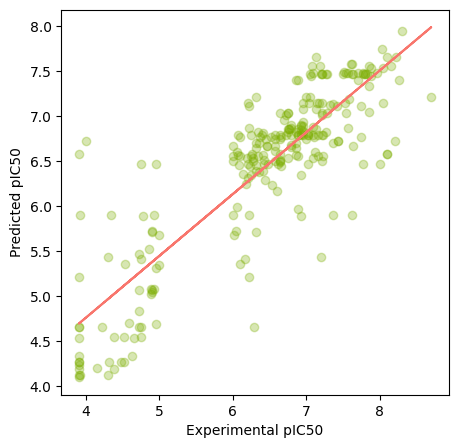

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [17]:
import pickle

In [18]:
pickle.dump(model, open('acetyltransferase.pkl', 'wb'))